In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json



In [5]:
def convert_bytes(size):
    for x in ['bytes', 'KB', 'MB', 'GB', 'TB']:
        if size < 1024.0:
            return "%3.2f %s" % (size, x)
        size /= 1024.0

    return size

In [3]:
with open('./callback_memory.json', 'r') as f:
    js = json.load(f)

In [9]:
for i in list(js.keys())[:-2]:
    txt = i +' : '
    for k in list(js[i]):
        txt += k + ' : ' + convert_bytes(js[i][k]) + ' | '
    print(txt)

model : max : 91.57 MB | cur : 91.57 MB | 
input : max : 91.77 MB | cur : 91.77 MB | 
output : max : 2.80 GB | cur : 2.80 GB | 
forward : max : 5.57 GB | cur : 5.57 GB | 
loss : max : 5.76 GB | cur : 5.57 GB | 
backward : max : 10.99 GB | cur : 5.59 GB | 
step : max : 10.99 GB | cur : 5.59 GB | 


In [17]:
f_max = []
f_cur = []
for j in js['hookF']:
    f_max.append(j['max'][0])
    f_cur.append(j['cur'][0])
    print(convert_bytes(j['max'][0]), convert_bytes(j['cur'][0]))

2.82 GB 2.81 GB
2.82 GB 2.81 GB
2.82 GB 2.81 GB
2.82 GB 2.82 GB
2.82 GB 2.82 GB
2.82 GB 2.82 GB
2.82 GB 2.82 GB
2.82 GB 2.82 GB
2.82 GB 2.82 GB
2.82 GB 2.82 GB
2.82 GB 2.82 GB
2.83 GB 2.83 GB
2.88 GB 2.86 GB
2.88 GB 2.86 GB
2.88 GB 2.86 GB
5.57 GB 5.57 GB


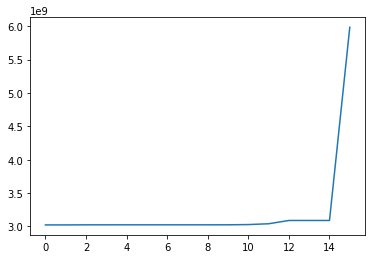

In [19]:
plt.plot(f_max)
#plt.plot(f_cur)
plt.show()

In [29]:
b_max = []
b_cur = []
for j in js['hookB']:
    b_max.append(j['max'][0])
    b_cur.append(j['cur'][0])
    print(convert_bytes(j['max'][0]), convert_bytes(j['cur'][0]))

10.99 GB 5.62 GB
10.99 GB 5.63 GB
10.99 GB 5.63 GB
10.99 GB 5.64 GB
10.99 GB 5.63 GB
10.99 GB 5.63 GB
10.99 GB 5.62 GB
10.99 GB 5.62 GB
10.99 GB 5.58 GB
10.99 GB 5.56 GB
10.99 GB 5.55 GB
10.99 GB 5.57 GB
10.99 GB 5.58 GB
10.99 GB 5.57 GB
10.99 GB 8.28 GB
10.99 GB 10.99 GB


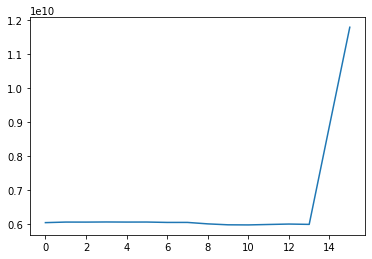

In [23]:
#plt.plot(f_max)
plt.plot(b_cur)
plt.show()

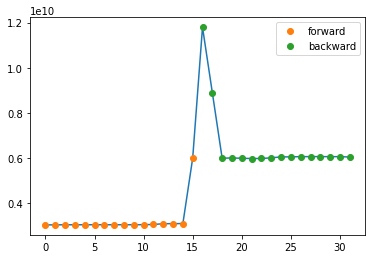

In [38]:
x1, x2 = list(range(len(f_cur))), list(range(len(f_cur),len(f_cur)+len(b_cur)))
plt.plot(x1+x2,f_cur + list(reversed(b_cur)))
plt.plot(x1,f_cur, 'o', label = 'forward')
plt.plot(x2,list(reversed(b_cur)), 'o', label = 'backward')
plt.legend()
plt.show()